In [ ]:
# missingno 패키지 : 결측 데이터를 시각화로 검색
# sklearn.impute 패키지 : 결측 데이터를 대체하는 작업
# sklearn.preprocessing 패키지 : 스케일링(정규화), 변환
# patsy 패키지 : 데이터 선택, 변환, 추가, 스케일링

In [ ]:
# isnull() or isna() : 결측데이터를 찾아내는 작업
# df.isnull().sum() : 결측 데이터의 개수

### 타이타닉의 생존자 정보를 제공하는 데이터셋

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 타이타닉의 컬럼 설명
- survived : 생존여부, 0-사망, 1-생존
- pclass : 고객등급, 1-2-3
- sex : 성별, male(남), female(여)
- sibsp : 동반한 형제자매 혹은 배우자 수 sibling & spouse
- parch : 동반한 부모 혹은 자녀의 수 parents & child
- embarked : 승선한 항구의 이니셜
- class : 객실등급, 1-2-3
- who : 대표고객의 성별, man, woman
- adult_male : 성인 남성 여부, True or False
- deck : 갑판
- embark_town : 승선한 항구의 지역명
- alive : 생존여부 yes, no
- alone : 혼자 True, False

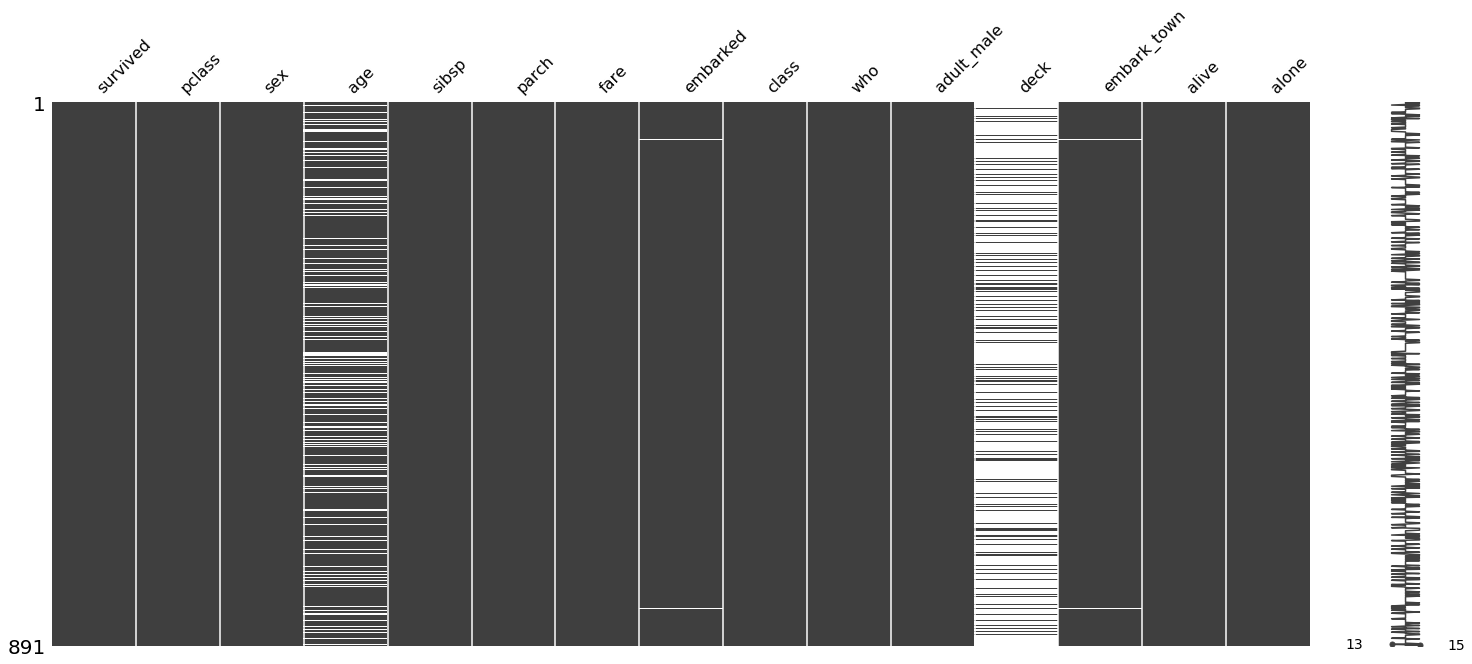

In [7]:
# 아나콘다 프롬프트 관리자 - pip install missingno
import missingno as msno

msno.matrix(titanic)
plt.show()

In [ ]:
# 오른쪽 - 스파크라인,, 지그재그-> 결측값많음

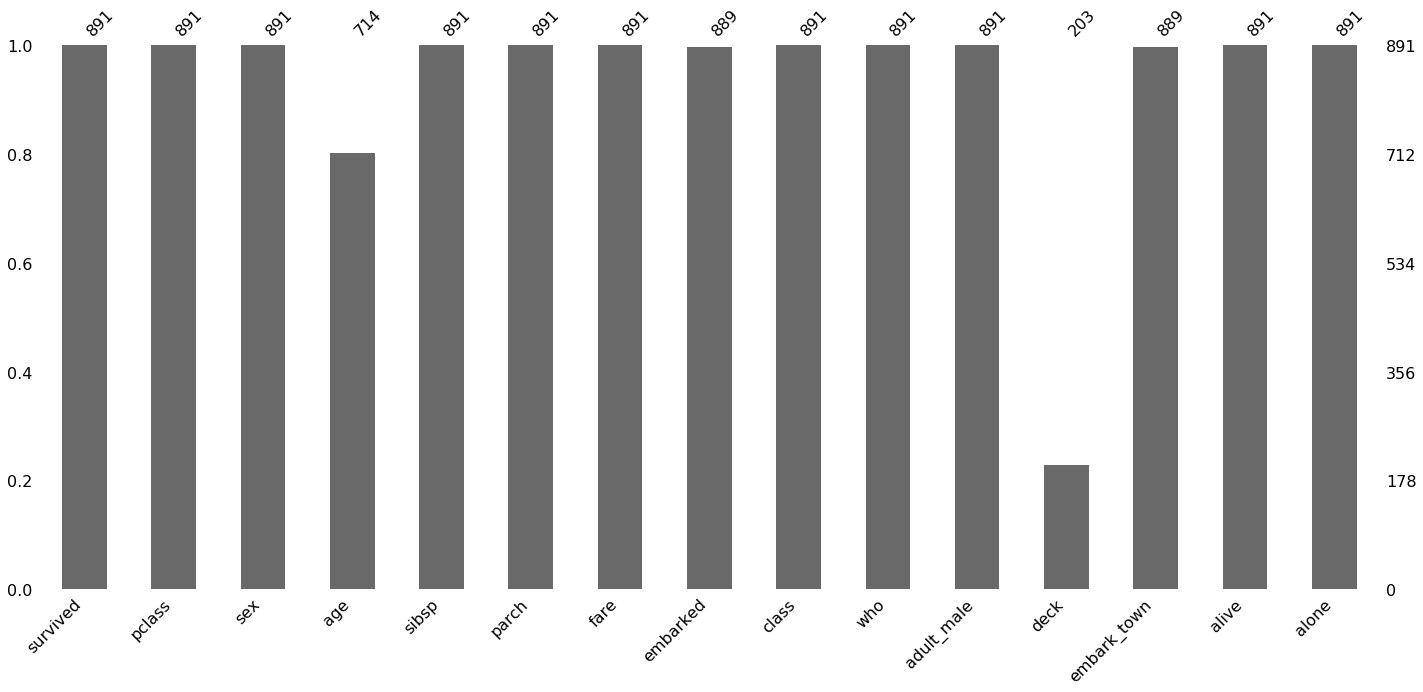

In [8]:
msno.bar(titanic)
plt.show()

In [ ]:
# 결측된 데이터를 처리하는 방법
## 결측된 데이터가 너무 많을 경우 해당 열 전체 삭제
## 결측된 데이터가 일부일 경우 결측값을 대체하는 작업

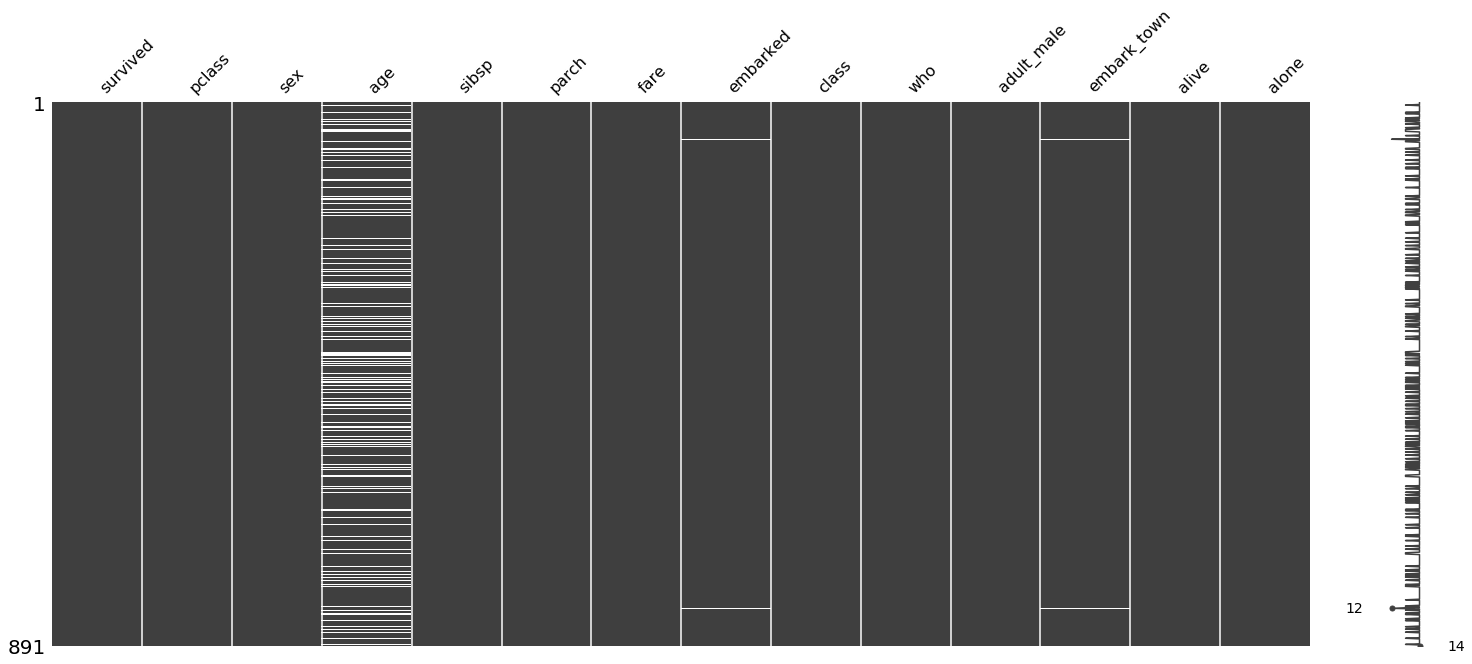

In [9]:
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic)*0.5), axis=1)
msno.matrix(titanic)
plt.show()

In [ ]:
# 범주형 데이터는 최빈값으로 대체함 most-frequency

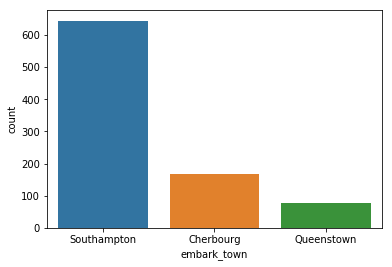

In [10]:
sns.countplot(titanic.embark_town)
plt.show()

In [ ]:
# 연속 데이터 -> 평균, 최빈값 으로 대체

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


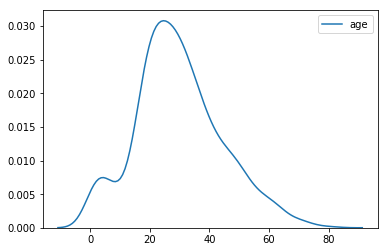

In [12]:
sns.kdeplot(titanic.age)
plt.show()

In [ ]:
# 결측데이터를 다른 값으로 대체하는 작업
# 해당 열의 비결측 데이터의 평균값(mean) 혹은 중앙값(median) 등으로 대체하는 작업
# scikit-learn의 simpleImputer 클래스를 활용
# strategy 옵션에
# 'mean'-평균값, 'median'-중앙값, 'most_frequent'-최빈값
### 데이터가 실수 연속값인 경우 평균 or 중앙값을 사용
### 값의 분포가 대칭적이면 평균이 좋고, 값의 분포가 심하게 비대칭이면 중앙값
### 데이터가 범주형이거나 정수값인 경우 최빈값
# fit_transform 메서드를 활용하여 대체값으로 채워진 데이터프레임 생성

In [13]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

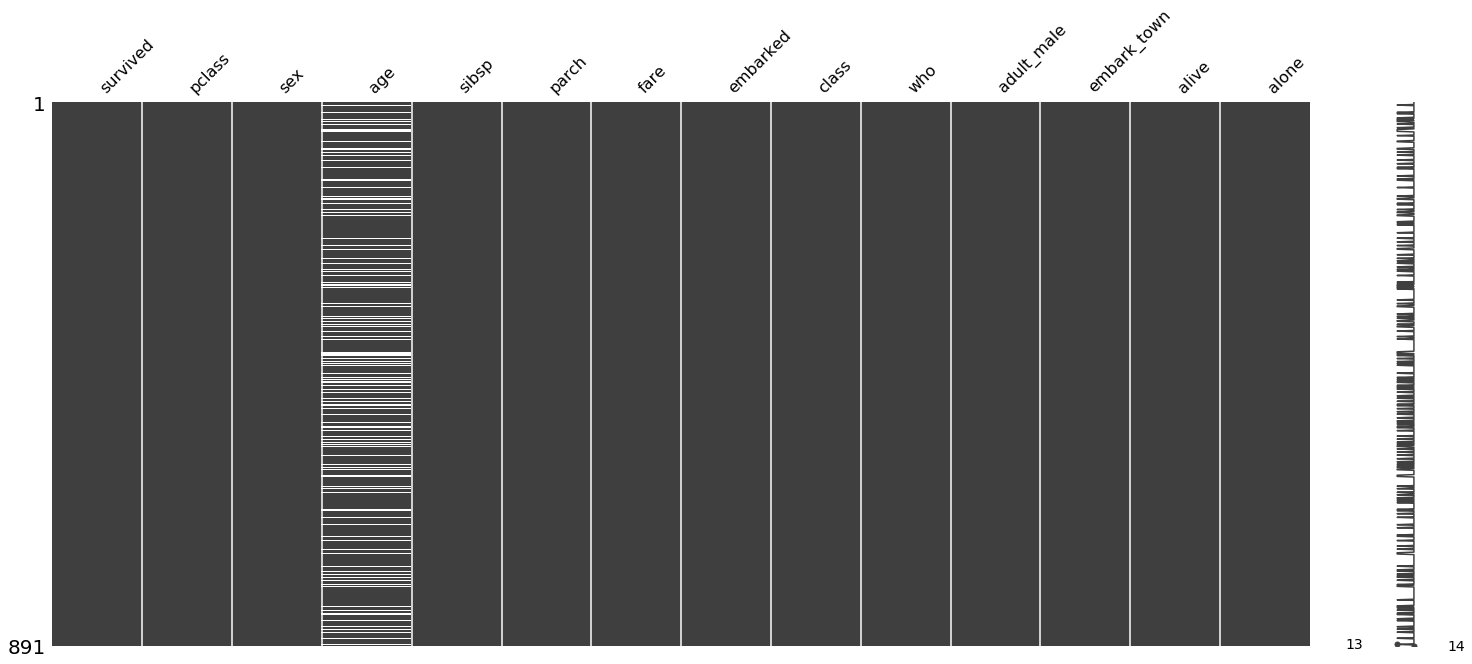

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
titanic['embark_town'] = imputer.fit_transform(titanic[['embark_town']])  # 2차원 배열처럼 써줘야함,,
titanic['embarked'] = imputer.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

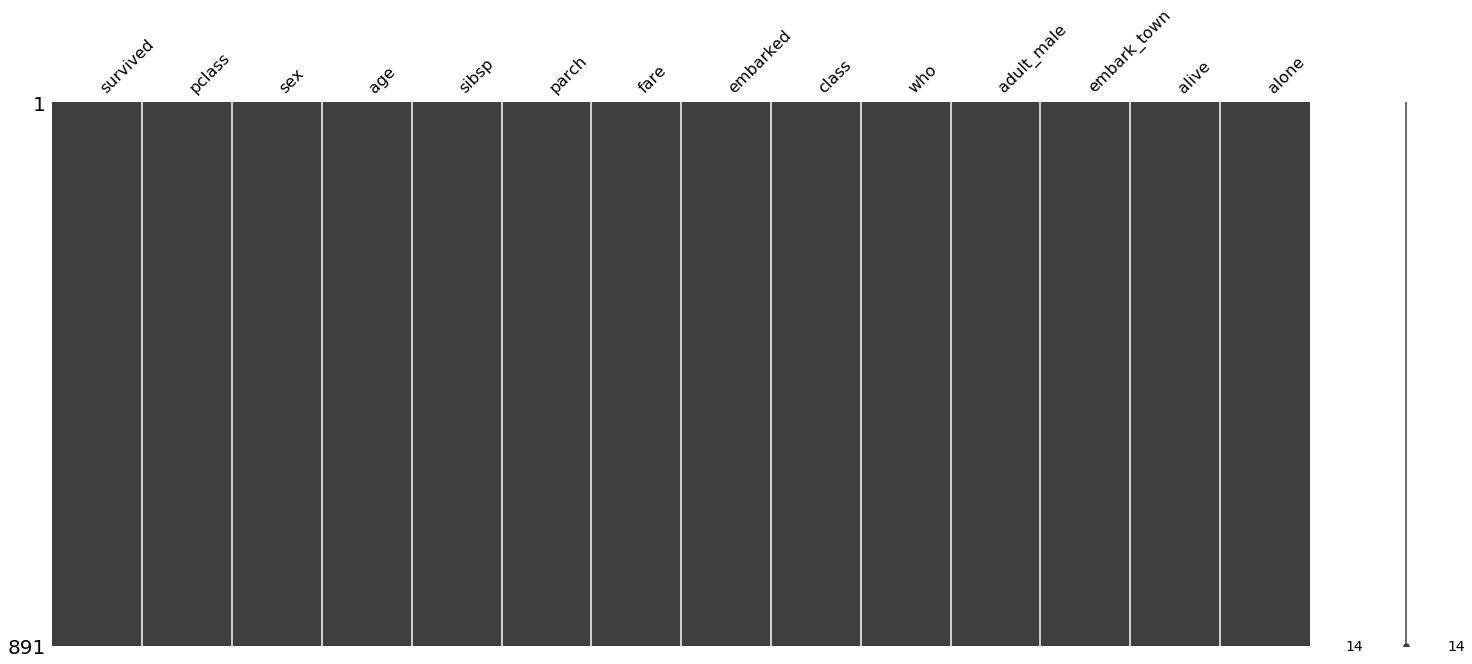

In [15]:
imputer_age = SimpleImputer(strategy = 'median')
titanic['age'] = imputer.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [18]:
# 불필요한 피처를 제거하는 작업
df_titanic = titanic.drop(['class','alive','who','embarked', 'embark_town'], axis=1)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,True,False
1,1,1,female,38.0,1,0,71.2833,False,False
2,1,3,female,26.0,0,0,7.9250,False,True
3,1,1,female,35.0,1,0,53.1000,False,False
4,0,3,male,35.0,0,0,8.0500,True,True


In [19]:
# 등급별 고객정보, 각 개체별 건수
df_titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

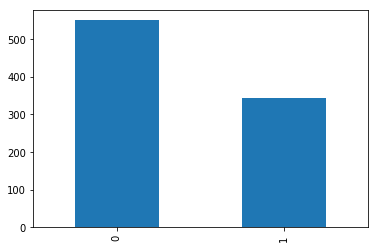

In [21]:
df_titanic['survived'].value_counts().plot.bar()

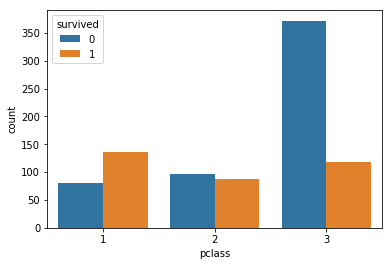

In [22]:
ax = sns.countplot(x='pclass', hue='survived', data=df_titanic)

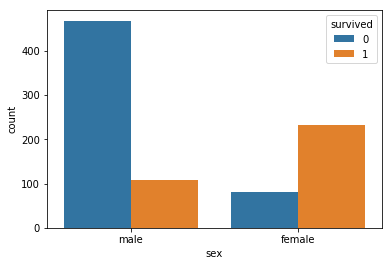

In [23]:
ax = sns.countplot(x='sex', hue='survived', data=df_titanic)

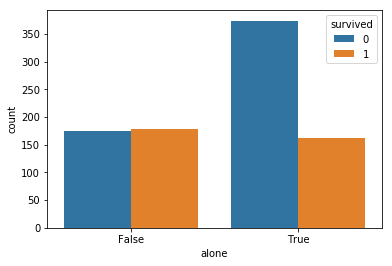

In [24]:
ax = sns.countplot(x='alone', hue='survived', data=df_titanic)

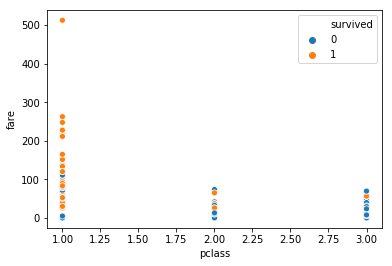

In [33]:
ax = sns.scatterplot(x='pclass', y='fare', hue='survived', data=df_titanic)

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip")